<a href="https://colab.research.google.com/github/CreyPoer/Praktikummodul7/blob/main/Skenario_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import scipy.stats
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from numpy.core.arrayprint import printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Proyek Sains Data/Tugas PASCA_UTS/winequality-red.csv')

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
jumlah_duplikat = data.duplicated().sum()

# Menampilkan jumlah data yang duplikat
print("Jumlah data yang duplikat:", jumlah_duplikat)

Jumlah data yang duplikat: 240


In [ ]:
# Menghapus data yang duplikat
data = data.drop_duplicates()

print("Banyaknya sisa data : ", data.shape[0])

Banyaknya sisa data :  1359


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Membuat model LOF
clf = LocalOutlierFactor(n_neighbors=20)  # Jumlah tetangga yang digunakan
outlier_scores = clf.fit_predict(data)

# Menampilkan indeks outlier
outlier_indices = np.where(outlier_scores == -1)[0]
print("Indeks outlier:",outlier_indices)
print("Indeks outlier:",len( outlier_indices))

Indeks outlier: [ 282  328  346  385  387  420  462  467  486  565  668  669  781  838
  888  918  920  963 1013 1052 1060 1216 1253 1325 1336]
Indeks outlier: 25


In [ ]:
list_from_outlier_indices = outlier_indices.tolist()
data_cleaned = data[outlier_scores != -1]  # Mengambil baris yang bukan outlier

print("Data sebelum penghapusan outlier:",len(data))
print("Data setelah penghapusan outlier:", len(data_cleaned))


Data sebelum penghapusan outlier: 1359
Data setelah penghapusan outlier: 1334


In [ ]:
fitur = data_cleaned.drop('quality', axis= 1)
target = data_cleaned['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [ ]:
target.value_counts()

0    1156
1     178
Name: quality, dtype: int64

### UNDER SAMPLING

In [ ]:
# import pandas as pd
# from sklearn.datasets import make_classification
# from collections import Counter
# from imblearn.under_sampling import RandomUnderSampler
# import matplotlib.pyplot as plt


# # Jumlah kelas sebelum under-sampling
# print("Jumlah kelas sebelum under-sampling:", Counter(target))


# # Melakukan under-sampling
# under_sampler = RandomUnderSampler(random_state=42)
# fitur_balance, target_balance = under_sampler.fit_resample(fitur,target)



In [ ]:
# # Plot original class distribution
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# sns.countplot(data=pd.DataFrame({'quality': target}), x='quality')
# plt.title('Original Class')

# # Plot resampled class distribution after Random Over-Sampling
# plt.subplot(1, 2, 2)
# sns.countplot(data=pd.DataFrame({'quality': target_balance}), x='quality')
# plt.title('Random Over-Sampling With imblearn')

# plt.tight_layout()
# plt.show()

### SMOTE SAMPLING

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada dataset
fitur_balance, target_balance = smote.fit_resample(fitur, target)

# Setelah SMOTE
print('Distribusi kelas setelah SMOTE:', Counter(target_balance))

Distribusi kelas setelah SMOTE: Counter({0: 1156, 1: 1156})


## RANDOM SAMPLING

In [ ]:
# # import library
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter

# # Initialize RandomOverSampler
# balancer = RandomOverSampler(random_state=42)

# # Apply Random Over-Sampling to balance the classes
# fitur_balance, target_balance = balancer.fit_resample(fitur, target)

# # Print resampled class distribution
# print('Resampled class distribution:', Counter(target_balance))

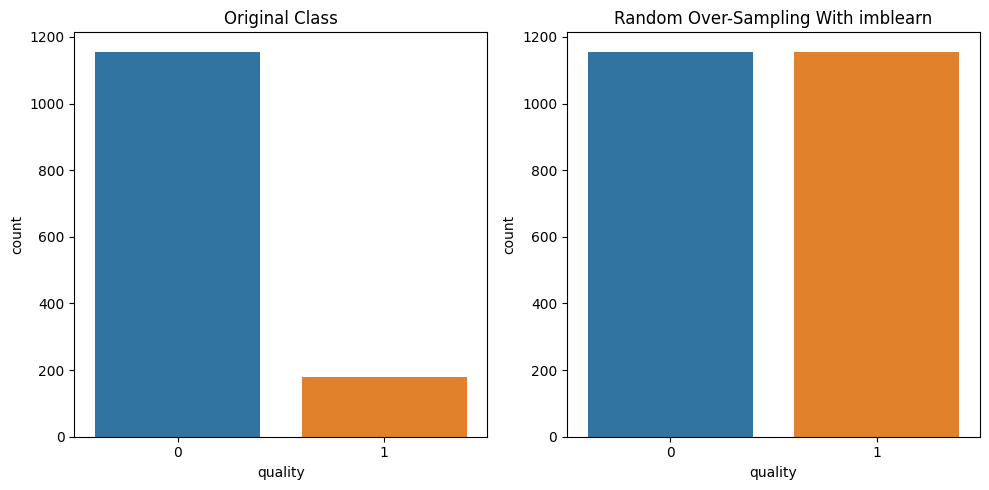

In [ ]:
# Plot original class distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=pd.DataFrame({'quality': target}), x='quality')
plt.title('Original Class')

# Plot resampled class distribution after Random Over-Sampling
plt.subplot(1, 2, 2)
sns.countplot(data=pd.DataFrame({'quality': target_balance}), x='quality')
plt.title('Random Over-Sampling With imblearn')

plt.tight_layout()
plt.show()

In [ ]:
data_seimbang = pd.concat([fitur_balance, target_balance], axis=1)
jumlah_duplikat = data_seimbang.duplicated().sum()

# Menampilkan jumlah data yang duplikat
print("Jumlah data yang duplikat:", jumlah_duplikat)

Jumlah data yang duplikat: 0


In [ ]:
fitur_train, fitur_test, target_train, target_test = train_test_split(fitur_balance, target_balance, test_size=0.25, random_state=42)

In [ ]:
sc = StandardScaler()
zscore_training = sc.fit_transform(fitur_train)
zscore_testing = sc.transform(fitur_test)

In [ ]:
mm = MinMaxScaler()
minmax_training = mm.fit_transform(fitur_train)
minmax_testing = mm.transform(fitur_test)

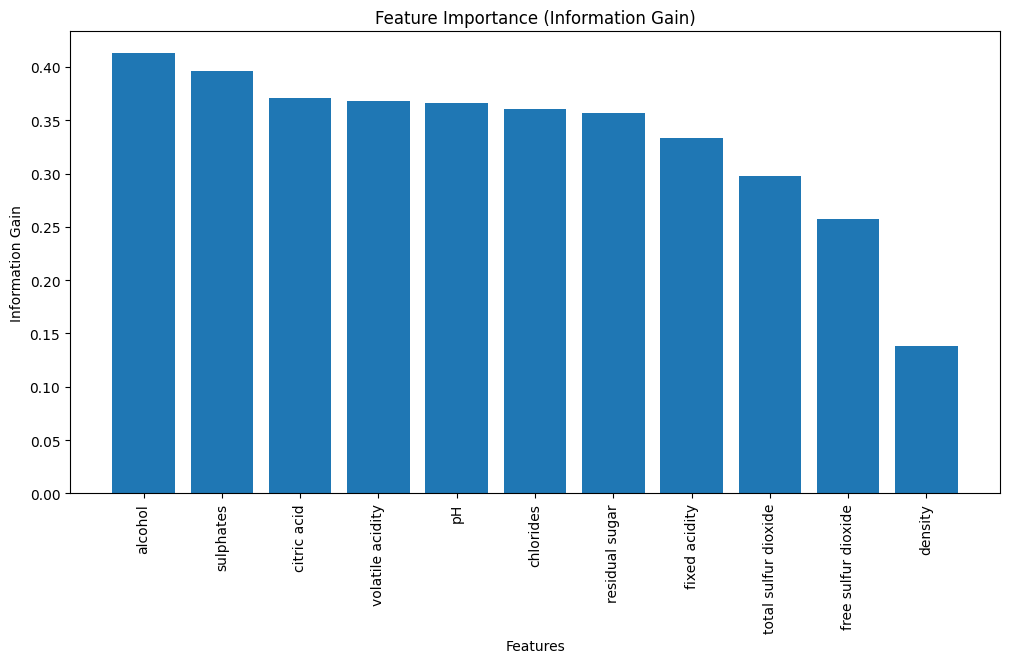

In [ ]:
import matplotlib.pyplot as plt
selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_new = selector.fit_transform(fitur_balance,target_balance)
scores = selector.scores_

feature_scores = selector.scores_
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Sort the feature scores in descending order
sorted_indices = feature_scores.argsort()[::-1]

# Get the sorted feature scores and names
sorted_scores = feature_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_names)), sorted_scores)
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Feature Importance (Information Gain)')
plt.show()

## MODELING


In [ ]:
# Free Sulfur Dioxide : 5
# Residual Sugar : 3
# pH : 8
# Fixed Acidity : 0
# Chlorides : 4
# Total Sulfur Dioxide : 6
# Citric Acid : 2
# Sulphates : 9
# Volatile Acidity : 1
# Alcohol : 10
# Density : 7

### DECISION TREE

In [ ]:
# Residual Sugar : 3
# Free Sulfur Dioxide : 5
# pH : 8
# Fixed Acidity : 0
# Chlorides : 4
# Total Sulfur Dioxide : 6
# Citric Acid : 2
# Sulphates : 9
# Volatile Acidity : 1
# Alcohol : 10
# Density : 7
# zscore_training = np.delete(zscore_training,[3,5,8,0,4,2,6,9,10,1], axis=1)
# zscore_testing = np.delete(zscore_testing,[3,5,8,0,4,2,6,9,10,1], axis=1)
# minmax_training = np.delete(minmax_training,[3,5,8,0,4,2,6,9,10,1], axis=1)
# minmax_testing = np.delete(minmax_testing,[3,5,8,0,4,2,6,9,10,1], axis=1)


### 11 FITUR

In [ ]:

# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']


Best Parameters: {'criterion': 'entropy', 'max_depth': 40, 'splitter': 'random'}
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_all = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_all = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_all)
print("AKURASI MINMAX :",accuracy_dt_minmax_all)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.8650519031141869
AKURASI MINMAX : 0.8460207612456747


### 10 FITUR

In [ ]:
zscore_training1 = np.delete(zscore_training,[3], axis=1)
zscore_testing1 = np.delete(zscore_testing,[3], axis=1)
minmax_training1 = np.delete(minmax_training,[3], axis=1)
minmax_testing1 = np.delete(minmax_testing,[3], axis=1)


# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training1, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training1, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']



Best Parameters: {'criterion': 'entropy', 'max_depth': 50, 'splitter': 'random'}
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training1, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing1)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_ten = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training1, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing1)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_ten = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_ten)
print("AKURASI MINMAX :",accuracy_dt_minmax_ten)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.856401384083045
AKURASI MINMAX : 0.8373702422145328


### 9 FITUR

In [ ]:
zscore_training2 = np.delete(zscore_training,[3,5], axis=1)
zscore_testing2 = np.delete(zscore_testing,[3,5], axis=1)
minmax_training2 = np.delete(minmax_training,[3,5], axis=1)
minmax_testing2 = np.delete(minmax_testing,[3,5], axis=1)


# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training2, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training2, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']



Best Parameters: {'criterion': 'gini', 'max_depth': 40, 'splitter': 'best'}
Best Parameters: {'criterion': 'gini', 'max_depth': 40, 'splitter': 'random'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training2, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing2)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_nine = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training2, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing2)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_nine = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_nine)
print("AKURASI MINMAX :",accuracy_dt_minmax_nine)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.8373702422145328
AKURASI MINMAX : 0.8650519031141869


### 8 FITUR

In [ ]:
zscore_training3 = np.delete(zscore_training,[3,5,8], axis=1)
zscore_testing3 = np.delete(zscore_testing,[3,5,8], axis=1)
minmax_training3 = np.delete(minmax_training,[3,5,8], axis=1)
minmax_testing3 = np.delete(minmax_testing,[3,5,8], axis=1)


# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training3, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training3, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']



Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'splitter': 'best'}
Best Parameters: {'criterion': 'gini', 'max_depth': 40, 'splitter': 'best'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training3, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing3)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_eight = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training3, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing3)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_eight = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_eight)
print("AKURASI MINMAX :",accuracy_dt_minmax_eight)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.8304498269896193
AKURASI MINMAX : 0.8269896193771626


### 7 FITUR

In [ ]:
zscore_training4 = np.delete(zscore_training,[3,5,8,0], axis=1)
zscore_testing4 = np.delete(zscore_testing,[3,5,8,0], axis=1)
minmax_training4 = np.delete(minmax_training,[3,5,8,0], axis=1)
minmax_testing4 = np.delete(minmax_testing,[3,5,8,0], axis=1)


# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training4, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training4, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']



Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training4, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing4)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_seven = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training4, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing4)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_seven = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_seven)
print("AKURASI MINMAX :",accuracy_dt_minmax_seven)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.8494809688581315
AKURASI MINMAX : 0.8442906574394463


### 6 FITUR

In [ ]:
zscore_training5 = np.delete(zscore_training,[3,5,8,0,4], axis=1)
zscore_testing5 = np.delete(zscore_testing,[3,5,8,0,4], axis=1)
minmax_training5 = np.delete(minmax_training,[3,5,8,0,4], axis=1)
minmax_testing5 = np.delete(minmax_testing,[3,5,8,0,4], axis=1)


# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training5, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training5, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']



Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training5, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing5)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_six = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training5, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing5)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_six = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_six)
print("AKURASI MINMAX :",accuracy_dt_minmax_six)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.8494809688581315
AKURASI MINMAX : 0.828719723183391


### 5 FITUR

In [ ]:
zscore_training6 = np.delete(zscore_training,[3,5,8,0,4,2], axis=1)
zscore_testing6 = np.delete(zscore_testing,[3,5,8,0,4,2], axis=1)
minmax_training6 = np.delete(minmax_training,[3,5,8,0,4,2], axis=1)
minmax_testing6 = np.delete(minmax_testing,[3,5,8,0,4,2], axis=1)


# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training6, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training6, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']



Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
Best Parameters: {'criterion': 'gini', 'max_depth': 40, 'splitter': 'random'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training6, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing6)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_five = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training6, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing6)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_five = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_five)
print("AKURASI MINMAX :",accuracy_dt_minmax_five)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.8391003460207612
AKURASI MINMAX : 0.8269896193771626


### 4 FITUR

In [ ]:
zscore_training7 = np.delete(zscore_training,[3,5,8,0,4,2,6], axis=1)
zscore_testing7 = np.delete(zscore_testing,[3,5,8,0,4,2,6], axis=1)
minmax_training7 = np.delete(minmax_training,[3,5,8,0,4,2,6], axis=1)
minmax_testing7 = np.delete(minmax_testing,[3,5,8,0,4,2,6], axis=1)


# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training7, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training7, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']



Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training7, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing7)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_four = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training7, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing7)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_four = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_four)
print("AKURASI MINMAX :",accuracy_dt_minmax_four)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.856401384083045
AKURASI MINMAX : 0.8529411764705882


### 3 FITUR

In [ ]:
zscore_training8 = np.delete(zscore_training,[3,5,8,0,4,2,6,9], axis=1)
zscore_testing8 = np.delete(zscore_testing,[3,5,8,0,4,2,6,9], axis=1)
minmax_training8 = np.delete(minmax_training,[3,5,8,0,4,2,6,9], axis=1)
minmax_testing8 = np.delete(minmax_testing,[3,5,8,0,4,2,6,9], axis=1)


# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training8, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training8, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']



Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training8, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing8)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_three = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training8, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing8)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_three = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_three)
print("AKURASI MINMAX :",accuracy_dt_minmax_three)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.8096885813148789
AKURASI MINMAX : 0.8269896193771626


### 2 FITUR

In [ ]:
zscore_training9 = np.delete(zscore_training,[3,5,8,0,4,2,6,9,10], axis=1)
zscore_testing9 = np.delete(zscore_testing,[3,5,8,0,4,2,6,9,10], axis=1)
minmax_training9 = np.delete(minmax_training,[3,5,8,0,4,2,6,9,10], axis=1)
minmax_testing9 = np.delete(minmax_testing,[3,5,8,0,4,2,6,9,10], axis=1)


# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training9, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training9, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']



Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training9, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing9)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_two = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training9, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing9)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_two = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_two)
print("AKURASI MINMAX :",accuracy_dt_minmax_two)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.754325259515571
AKURASI MINMAX : 0.754325259515571


### 1 FITUR

In [ ]:
zscore_training10 = np.delete(zscore_training,[3,5,8,0,4,2,6,9,10,1], axis=1)
zscore_testing10 = np.delete(zscore_testing,[3,5,8,0,4,2,6,9,10,1], axis=1)
minmax_training10 = np.delete(minmax_training,[3,5,8,0,4,2,6,9,10,1], axis=1)
minmax_testing10 = np.delete(minmax_testing,[3,5,8,0,4,2,6,9,10,1], axis=1)


# Define the parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Create GridSearchCV for Decision Tree
grid_search3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search3.fit(zscore_training10, target_train)
grid_search4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search4.fit(minmax_training10, target_train)

# Display the best parameters
print("Best Parameters:", grid_search3.best_params_)
print("Best Parameters:", grid_search4.best_params_)

# Use the best parameters to create the Decision Tree model
best_criterion_zscore = grid_search3.best_params_['criterion']
best_splitter_zscore = grid_search3.best_params_['splitter']
best_max_depth_zscore = grid_search3.best_params_['max_depth']

best_criterion_minmax = grid_search4.best_params_['criterion']
best_splitter_minmax = grid_search4.best_params_['splitter']
best_max_depth_minmax = grid_search4.best_params_['max_depth']



Best Parameters: {'criterion': 'gini', 'max_depth': 50, 'splitter': 'random'}
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}


In [ ]:
# ZSCORE
model_dt_zscore = DecisionTreeClassifier(criterion=best_criterion_zscore,splitter=best_splitter_zscore,max_depth=best_max_depth_zscore)
model_dt_zscore.fit(zscore_training10, target_train)
# Lakukan prediksi pada data uji dengan normalisasi zscore
y_pred_zscore = model_dt_zscore.predict(zscore_testing10)
# Hitung akurasi dengan normalisasi zscore
accuracy_dt_zscore_one = accuracy_score(target_test, y_pred_zscore)

# MINMAX
model_dt_minmax = DecisionTreeClassifier(criterion=best_criterion_minmax,splitter=best_splitter_minmax,max_depth=best_max_depth_minmax)
model_dt_minmax.fit(minmax_training10, target_train)
# Lakukan prediksi pada data uji dengan normalisasi minmax
y_pred_minmax = model_dt_minmax.predict(minmax_testing10)
# Hitung akurasi dengan normalisasi minmax
accuracy_dt_minmax_one = accuracy_score(target_test, y_pred_minmax)

print("AKURASI DECISSION TREE")
print("AKURASI ZSCORE :",accuracy_dt_zscore_one)
print("AKURASI MINMAX :",accuracy_dt_minmax_one)


AKURASI DECISSION TREE
AKURASI ZSCORE : 0.7370242214532872
AKURASI MINMAX : 0.7439446366782007


### HASIL

In [ ]:
print("AKURASI RANDOM FOREST")
print("ALL")
print("AKURASI ZSCORE :",accuracy_dt_zscore_all)
print("AKURASI MINMAX :",accuracy_dt_minmax_all)
print("10")
print("AKURASI ZSCORE :",accuracy_dt_zscore_ten)
print("AKURASI MINMAX :",accuracy_dt_minmax_ten)
print("9")
print("AKURASI ZSCORE :",accuracy_dt_zscore_nine)
print("AKURASI MINMAX :",accuracy_dt_minmax_nine)
print("8")
print("AKURASI ZSCORE :",accuracy_dt_zscore_eight)
print("AKURASI MINMAX :",accuracy_dt_minmax_eight)
print("7")
print("AKURASI ZSCORE :",accuracy_dt_zscore_seven)
print("AKURASI MINMAX :",accuracy_dt_minmax_seven)
print("6")
print("AKURASI ZSCORE :",accuracy_dt_zscore_six)
print("AKURASI MINMAX :",accuracy_dt_minmax_six)
print("5")
print("AKURASI ZSCORE :",accuracy_dt_zscore_five)
print("AKURASI MINMAX :",accuracy_dt_minmax_five)
print("4")
print("AKURASI ZSCORE :",accuracy_dt_zscore_four)
print("AKURASI MINMAX :",accuracy_dt_minmax_four)
print("3")
print("AKURASI ZSCORE :",accuracy_dt_zscore_three)
print("AKURASI MINMAX :",accuracy_dt_minmax_three)
print("2")
print("AKURASI ZSCORE :",accuracy_dt_zscore_two)
print("AKURASI MINMAX :",accuracy_dt_minmax_two)
print("1")
print("AKURASI ZSCORE :",accuracy_dt_zscore_one)
print("AKURASI MINMAX :",accuracy_dt_minmax_one)

AKURASI RANDOM FOREST
ALL
AKURASI ZSCORE : 0.8650519031141869
AKURASI MINMAX : 0.8460207612456747
10
AKURASI ZSCORE : 0.856401384083045
AKURASI MINMAX : 0.8373702422145328
9
AKURASI ZSCORE : 0.8373702422145328
AKURASI MINMAX : 0.8650519031141869
8
AKURASI ZSCORE : 0.8304498269896193
AKURASI MINMAX : 0.8269896193771626
7
AKURASI ZSCORE : 0.8494809688581315
AKURASI MINMAX : 0.8442906574394463
6
AKURASI ZSCORE : 0.8494809688581315
AKURASI MINMAX : 0.828719723183391
5
AKURASI ZSCORE : 0.8391003460207612
AKURASI MINMAX : 0.8269896193771626
4
AKURASI ZSCORE : 0.856401384083045
AKURASI MINMAX : 0.8529411764705882
3
AKURASI ZSCORE : 0.8096885813148789
AKURASI MINMAX : 0.8269896193771626
2
AKURASI ZSCORE : 0.754325259515571
AKURASI MINMAX : 0.754325259515571
1
AKURASI ZSCORE : 0.7370242214532872
AKURASI MINMAX : 0.7439446366782007
